# 矩阵相关程度

- matrix_correlation/

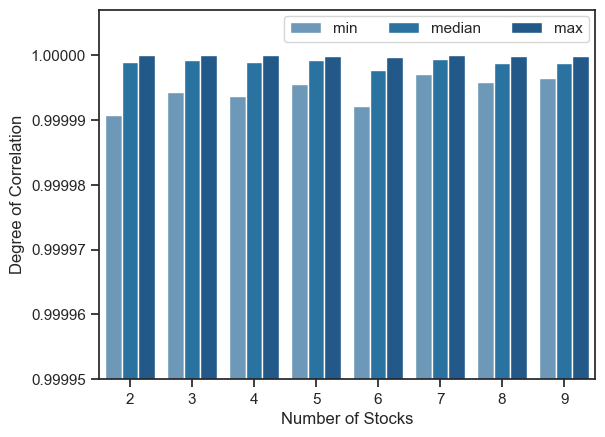

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
input_file = f"result/matrix_correlation/pearson_corr.csv"
#input_file = f"result/matrix_correlation/pearson_corr_more.csv"
data = pd.read_csv(input_file)
# 选取数据
df = data[['num_assets', 'min', 'median', 'max']]
# 重塑数据框
df_melt = df.melt('num_assets', var_name='Stat', value_name='Value')
# 设置绘图风格
sns.set(style='ticks')
"""
whitegrid
darkgrid: 黑色网格背景风格。
white: 白色背景风格，无网格。
dark: 黑色背景风格，无网格。
ticks: 白色背景风格，显示刻度线。
"""
# 构造子图
fig, ax = plt.subplots()
# 定义每根柱子的颜色，使用RGB元组
colors = [(97, 154, 195), (22, 119, 179), (17, 90, 154)]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# 绘制柱状图
sns.barplot(x='num_assets', y='Value', hue='Stat', data=df_melt, palette=colors, ax=ax)

# 调整y轴的刻度范围
ax.set_ylim(0.99995, 1.0000) 
# 自定义y轴上的数值标签
# 设置自定义的刻度数量
num_ticks = 6
# 生成等间隔的刻度值
custom_y_ticks = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_ticks)
# 自定义y轴上的刻度标签
custom_y_labels = [f'{tick:.5f}' for tick in custom_y_ticks]
# 设置y轴刻度
plt.yticks(custom_y_ticks, custom_y_labels)
# 添加空间
plt.ylim(top=1.000007)  # 调整y轴的上限，用来容纳标签
# 添加图例，并设置水平显示
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=3, borderaxespad=0.4)
"""
borderaxespad: 整体离边缘的距离
"""

# 设置图表标题和坐标轴标签 TODO 选文字
#plt.title('Chart')
plt.xlabel('Number of Stocks')
plt.ylabel('Degree of Correlation')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/matrix_correlation/matrix_correlation_2_7.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

# 显示图表
#plt.show()